# Import Libraries

In [4]:
from keras import layers
from keras import models
import keras as k
import sys
import matplotlib.pyplot as plt
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os

%matplotlib inline

print('Keras Version: ', k.__version__)
print('Python Verson: ', sys.version)

Keras Version:  2.1.6
Python Verson:  3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]


# Fetch a sample image

We'll explore what data augmentation does using samples from our training images in the cats vs dogs image classificatoin dataset

In [13]:
def fetch_train_val_test_dir(base_directory):
    # Define data directories from import notebook
    base_dir = base_directory

    train_dir = os.path.join(base_dir, 'train')
    validation_dir = os.path.join(base_dir, 'validation')
    test_dir = os.path.join(base_dir, 'test')

    return train_dir, validation_dir, test_dir

In [14]:
train_dir,_, _ = fetch_train_val_test_dir('/home/ubuntu/deep-learning-practice/data/cats_dogs_small')
train_cats_dir = os.path.join(train_dir, 'cats')

In [35]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[29]

img = image.load_img(img_path, target_size=(150, 150))

So this is the sample image we'll try to augment in this exercise

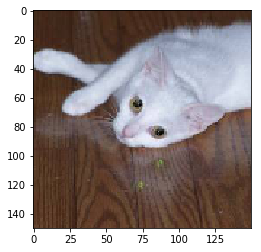

In [36]:
plt.figure()
plt.imshow(img) 
plt.show()

In [37]:
x = image.img_to_array(img) # 150 x 150 square images with 3 channels (RGB)
print(x.shape)

x = x.reshape((1,) + x.shape) # We reshape the image array to rank 4 because the ImageDataGenerator expects batches of 3D image arrays
print(x.shape)

(150, 150, 3)
(1, 150, 150, 3)


In [40]:
datagen = ImageDataGenerator(
            rotation_range=80,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.4,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

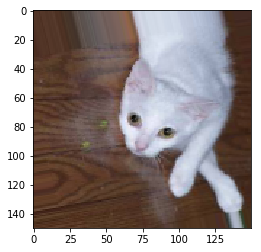

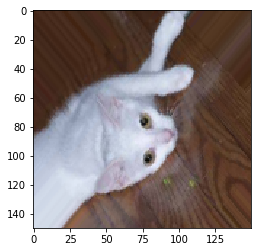

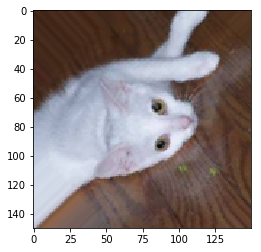

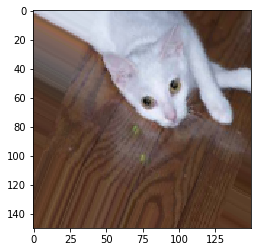

In [43]:
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()